Import Libraries and Data

In [13]:
# importing libs
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns


# loading local data
df = pd.read_csv("/Users/suegreen/Downloads/projects/data/3_Project/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Clean Data

In [3]:
df_DA_DE = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_DE = df_DA_DE.dropna(subset=['salary_year_avg'])

df_DA_DE_exploded = df_DA_DE.explode('job_skills')

df_DA_DE_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
20066,75067.5,r
20066,75067.5,python
20066,75067.5,java
20066,75067.5,c#
20066,75067.5,sql


Calculate Percent of Job Postings that Have Skills

In [4]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_DE_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_DE)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,24,101500.00,50.000000
python,18,111175.00,37.500000
tableau,13,100500.00,27.083333
spark,7,111175.00,14.583333
r,7,75067.50,14.583333
excel,7,105650.00,14.583333
looker,5,53014.00,10.416667
power bi,4,83937.50,8.333333
go,4,52014.00,8.333333


Median Salary vs Percent Skill Demand

In [5]:

skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

df_DA_skills_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
sql,24,101500.0,50.000000
python,18,111175.0,37.500000
tableau,13,100500.0,27.083333
spark,7,111175.0,14.583333
r,7,75067.5,14.583333
excel,7,105650.0,14.583333
looker,5,53014.0,10.416667
power bi,4,83937.5,8.333333
go,4,52014.0,8.333333


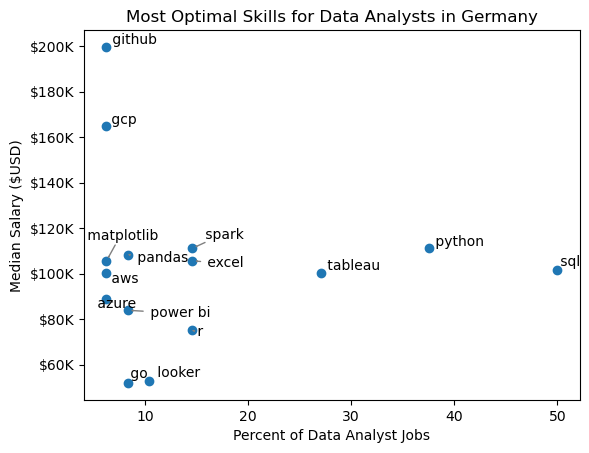

In [7]:
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in Germany')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

Coloring by Technology

In [8]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['datarobot',
  'sap',
  'visio',
  'excel',
  'sas',
  'power bi',
  'powerbi',
  'cognos',
  'dax',
  'splunk',
  'spreadsheet',
  'sharepoint',
  'ms access',
  'sheets',
  'ssrs',
  'powerpoint',
  'microstrategy',
  'esquisse',
  'alteryx',
  'tableau',
  'qlik',
  'nuix',
  'msaccess',
  'looker',
  'ssis',
  'word',
  'outlook',
  'spss'],
 'programming': ['objective-c',
  'c',
  'f#',
  'matlab',
  'swift',
  'php',
  'ruby',
  'vb.net',
  'apl',
  'sql',
  'nosql',
  'dart',
  'css',
  'ocaml',
  'sas',
  'clojure',
  'r',
  'visual basic',
  'typescript',
  'scala',
  'mongo',
  'golang',
  'elixir',
  'c#',
  'visualbasic',
  'c++',
  'assembly',
  'delphi',
  'haskell',
  'javascript',
  'rust',
  'perl',
  'shell',
  'vba',
  'lisp',
  'no-sql',
  't-sql',
  'groovy',
  'kotlin',
  'go',
  'java',
  'crystal',
  'powershell',
  'pascal',
  'erlang',
  'lua',
  'julia',
  'cobol',
  'fortran',
  'python',
  'sass',
  'solidity',
  'mongodb',
  'html',
  'b

In [9]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,datarobot
0,analyst_tools,sap
0,analyst_tools,visio
0,analyst_tools,excel
0,analyst_tools,sas
...,...,...
9,sync,google chat
9,sync,slack
9,sync,symphony
9,sync,twilio


In [10]:
# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,24,101500.00,50.000000,programming,sql
1,18,111175.00,37.500000,programming,python
2,13,100500.00,27.083333,analyst_tools,tableau
3,7,111175.00,14.583333,libraries,spark
4,7,75067.50,14.583333,programming,r
5,7,105650.00,14.583333,analyst_tools,excel
6,5,53014.00,10.416667,analyst_tools,looker
7,4,83937.50,8.333333,analyst_tools,power bi
8,4,52014.00,8.333333,programming,go
9,4,108412.50,8.333333,libraries,pandas


In [11]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]
df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,24,101500.0,50.000000,programming,sql
1,18,111175.0,37.500000,programming,python
2,13,100500.0,27.083333,analyst_tools,tableau
3,7,111175.0,14.583333,libraries,spark
4,7,75067.5,14.583333,programming,r
5,7,105650.0,14.583333,analyst_tools,excel
6,5,53014.0,10.416667,analyst_tools,looker
7,4,83937.5,8.333333,analyst_tools,power bi
8,4,52014.0,8.333333,programming,go
9,4,108412.5,8.333333,libraries,pandas


Plot the results in a scatter plot, coloring the points based on the 'technology' column.

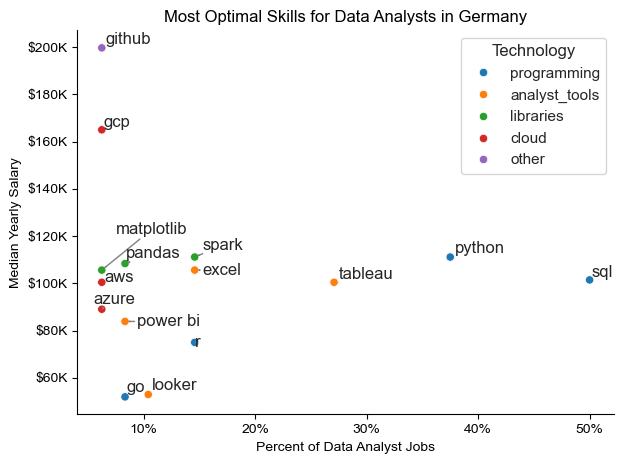

In [12]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in Germany')
plt.legend(title='Technology')


from matplotlib.ticker import FuncFormatter, PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


# Adjust layout and display plot 
plt.tight_layout()
plt.show()